In [52]:
import numpy as  np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [69]:
from pandas_profiling import ProfileReport

In [4]:
df = pd.read_csv('/Users/tranhuonggiang/Documents/BI_DA/KHTN/KHTN_Machine Learning/2. Linear Regression/Data/location_rev.csv')

In [5]:
df.head(5)

revenue  num_competitors  median_income  num_loyalty_members  \
0  42247.80                3       30527.57                 1407   
1  38628.37                3       30185.49                 1025   
2  39715.16                1       32182.24                 1498   
3  35593.30                5       29728.65                 2340   
4  35128.18                4       30691.17                  847   

   population_density  location_age  
0                3302            12  
1                4422            11  
2                3260            12  
3                4325            10  
4                3774            11

In [6]:
#Use pandas profiling to have a quick overview about df 
profile = ProfileReport(df, title='Revenue Data')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 1. Single Linear Regression 

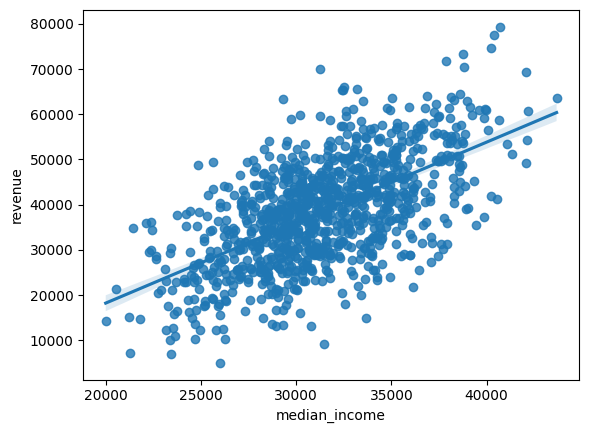

In [10]:
#Create scatter plot between rev and median income 
sns.regplot(x='median_income',y='revenue',data=df);

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['median_income'],df['revenue'],test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

In [15]:
#create a model 
model = LinearRegression()

In [17]:
#fit model to training dataset
model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [26]:
y1_pred = model.predict(X_test.values.reshape(-1,1))

In [19]:
#intercept & coefficent 
print(model.intercept_)
print(model.coef_)

-16480.38039324987
[1.7529175]


In [22]:
#R_square 
model.score(X_test.values.reshape(-1,1),y_test)

0.3827463826359234

> ***Model is not good due to poor data***

In [24]:
# MSE, RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
mse = mean_squared_error(y_test, y1_pred)
mae = mean_absolute_error(y_test, y1_pred)
rmse = np.sqrt(mse)

In [28]:
print('Mean Square Error: ', mse)
print('Mean Absolute Error: ', mae)
print('Root Mean Square Error: ', rmse)

Mean Square Error:  86324228.14218268
Mean Absolute Error:  7625.873763741533
Root Mean Square Error:  9291.083259888626


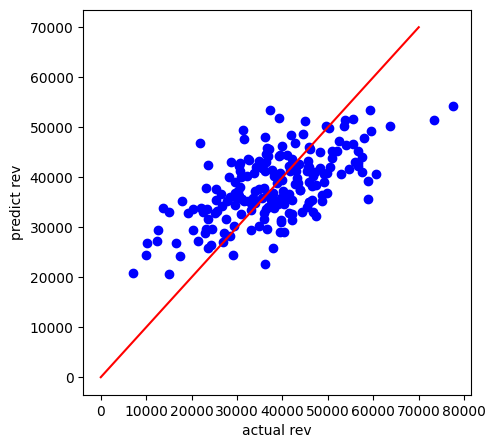

In [38]:
#plot regession line between actual & predicted revenue 
plt.figure(figsize = (5,5))
plt.scatter(y_test,y1_pred,color='blue')
plt.xlabel('actual rev')
plt.ylabel('predict rev')
plt.plot([0,70000],[0,70000], color ='red')
plt.show()

> Predict value is not so closed to actual value

### 2. Multiple Linear Regression

In [40]:
df.head(2)

revenue  num_competitors  median_income  num_loyalty_members  \
0  42247.80                3       30527.57                 1407   
1  38628.37                3       30185.49                 1025   

   population_density  location_age  
0                3302            12  
1                4422            11

In [41]:
X2 = df[[
    'num_competitors',
    'median_income',
    'num_loyalty_members',
    'population_density',
    'location_age'
]]

y2 = df['revenue']

In [42]:
#split 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
#Intecept & coefficient
print(model.intercept_) 
print(model.coef_)

-51288.646172415305
[-2.08947163e+03  1.72577149e+00  3.51155871e+00  4.22884015e+00
  2.07374090e+03]


In [45]:
y2_pred = model.predict(X_test)

In [54]:
y_pred = model.predict(X_train)

In [47]:
#R_square 
model.score(X_test, y_test)

0.8086918921337009

> the accuracy is much more better with more than 80% 

In [49]:
mse = mean_squared_error(y_test, y2_pred)
mae = mean_absolute_error(y_test, y2_pred)
rmse = np.sqrt(mse)

print('mean_squared_error: ', mse)
print('mean_absolute_error: ', mae)
print('root_mean_squared_error: ', rmse)

mean_squared_error:  26754844.82281922
mean_absolute_error:  4310.862854947777
root_mean_squared_error:  5172.508561889407


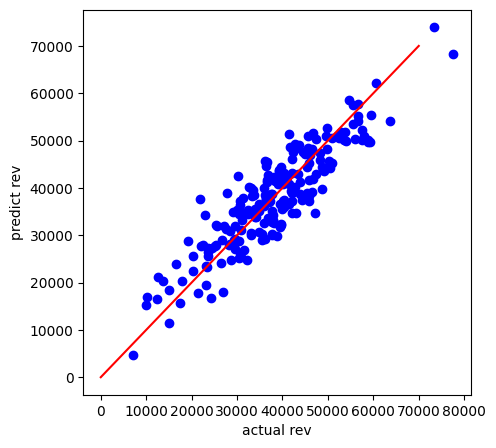

In [50]:
#plot the regression between pred & actual rev 
plt.figure(figsize = (5,5))
plt.scatter(y_test,y2_pred,color='blue')
plt.xlabel('actual rev')
plt.ylabel('predict rev')
plt.plot([0,70000],[0,70000], color ='red')
plt.show()

> Predicted revenue is more closer to actual revenue 

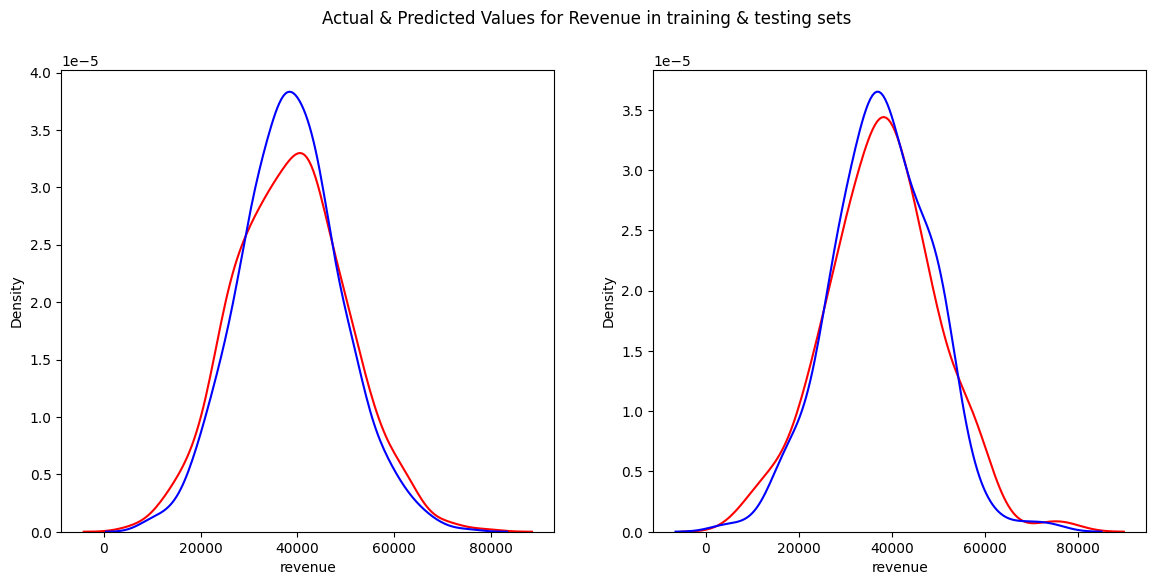

In [60]:
#Plot the distribution of revenue in training & testing sets 
plt.figure(figsize=(14,6)) 

#Training set 
plt.subplot(1, 2, 1) 
ax1=sns.distplot(y_train, hist=False, color='r', label='actual training value')
sns.distplot(y_pred, hist=False, color='b', label='predict training value')
             
#Testing set 
plt.subplot(1, 2, 2) 
ax2=sns.distplot(y_test, hist=False, color='r', label='actual testing value')
sns.distplot(y2_pred, hist=False, color='b', label='predict testing value') 

#Title 
plt.suptitle('Actual & Predicted Values for Revenue in training & testing sets')
plt.show()

> Data distribution between actual & predict is pretty the same => pretty good model 

### 3. Feature Selection

In [61]:
from sklearn.feature_selection import SelectKBest, f_regression 

In [65]:
#Apply SelectKBest to extract top features
selector = SelectKBest(f_regression, k='all')
fit = selector.fit(X_train, y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)

In [67]:
#concat 2 dataframes for better visualization
featureScores = pd.concat([df_columns, df_scores], axis=1)
featureScores.columns = ['Feature', 'Score'] #naming columns
#Sorting 
featureScores.sort_values(by='Score', ascending=False, inplace=True)

In [68]:
featureScores

Feature       Score
1        median_income  441.912898
4         location_age  351.189293
3   population_density   88.560961
2  num_loyalty_members   25.392022
0      num_competitors   25.310076